# Titanic Survival Prediction

# Load & Explore

In [102]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head(5)
df.info()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing Values

In [103]:
df.drop(columns=["Cabin"], inplace=True)
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Encoding

In [104]:
df["Sex"]=df["Sex"].map({"male" : 0, "female" : 1})
df=pd.get_dummies(df, columns=["Embarked"], prefix_sep="Embarked")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,EmbarkedEmbarkedC,EmbarkedEmbarkedQ,EmbarkedEmbarkedS
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


# Feature Selection

In [105]:
df.drop(columns=["PassengerId","Name","Ticket"], inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'EmbarkedEmbarkedC', 'EmbarkedEmbarkedQ', 'EmbarkedEmbarkedS'],
      dtype='object')

# Scale Numerical Features

In [106]:
from sklearn.preprocessing import StandardScaler
num_cols=["Age","Fare","SibSp","Parch"]
scaler=StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

,Age,Fare,SibSp,Parch
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18,4.386066e-17,5.382900e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01,-4.745452e-01,-4.736736e-01
25%,-5.657365e-01,-4.891482e-01,-4.745452e-01,-4.736736e-01
50%,-1.046374e-01,-3.573909e-01,-4.745452e-01,-4.736736e-01
75%,4.333115e-01,-2.424635e-02,4.327934e-01,-4.736736e-01
max,3.891554e+00,9.667167e+00,6.784163e+00,6.974147e+00


# Split Data into Training and Testing Sets

In [107]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Visualize Data

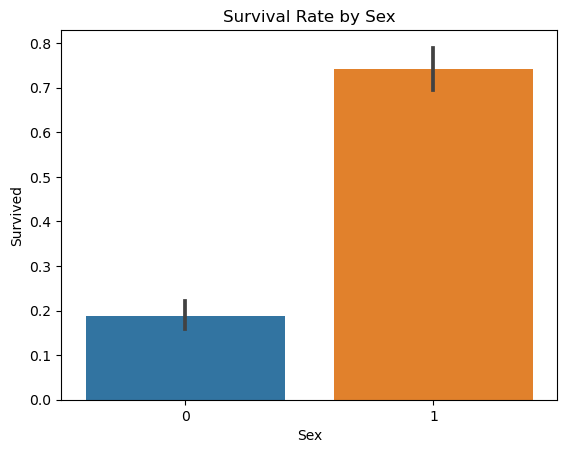

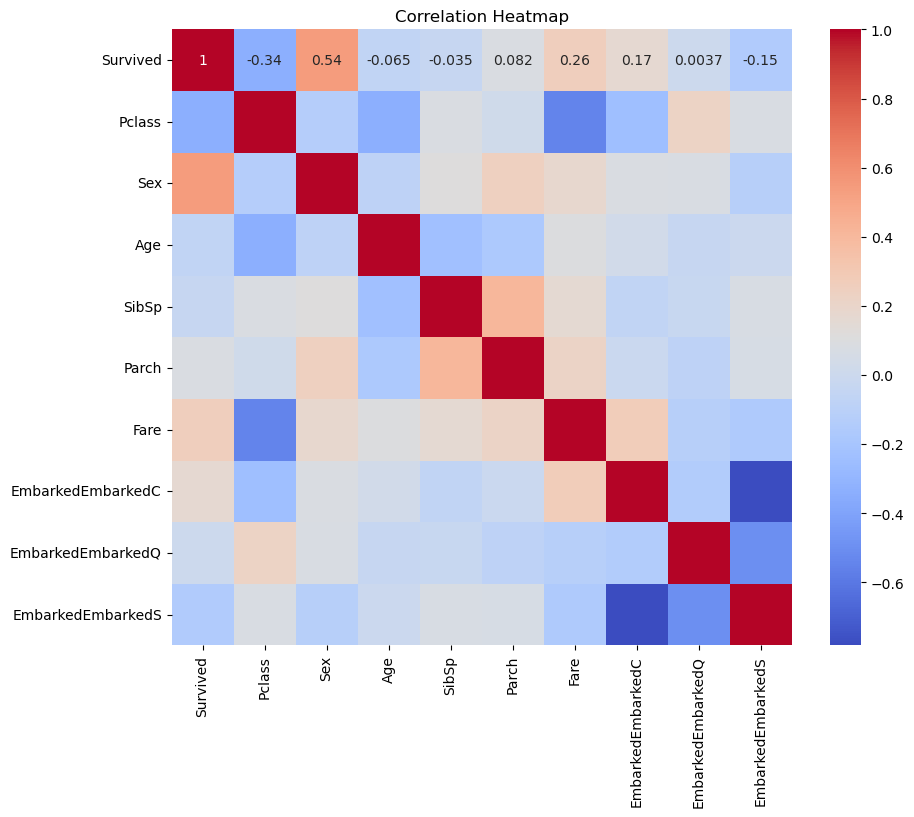

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Titanic Survival Prediction

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8100558659217877